## MIS6382.502.Group11 : Books in a Library data analysis & visualization


*   Note : we have coded the entire project in google collab and have added some libraries of google collab, please use google collab to run the code



##Explanation of Imported Libraries
-- The following Python libraries are imported to handle various tasks in the project.
* **pickle** is used to serialize and deserialize Python objects, enabling the saving and loading of complex data structures.
* **csv** is used for reading and writing CSV files, while **pandas** helps in handling and analyzing data in tabular form.
* **matplotlib.pyplot and seaborn** are used for creating high-quality visualizations, and **shutil** provides utilities for file operations like copying and moving files.
* **files from Google Colab** allows for file uploading and downloading in the environment.

In [ ]:
import pickle
import csv
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
from matplotlib.patches import Patch
from google.colab import files

##Explanation of Book Class and Inheritance
* The Book class defines the core attributes of a book and includes a __str__ method for CSV formatting.
* FictionBook and NonFictionBook inherit from Book, specifying book types while using the base class's attributes.
* MysteryBook, ScienceBook, and BiographyBook extend further, adding specific genres to the respective book types.
* This inheritance structure simplifies data management and categorization, making it easier to handle books by type and genre.
* The __str__ method enables easy conversion of book data into a CSV format, ensuring smooth data export.

In [ ]:
class Book:
    def __init__(self, date, title, genre, book_type, rating, price, average_reading_time):
        """
        Initializes a Book object with the specified attributes.
        """
        self.date = date
        self.title = title
        self.genre = genre
        self.type = book_type
        self.rating = rating
        self.price = price
        self.average_reading_time = average_reading_time
        self.unique_id = id(self)  # Assigning memory id as unique_id

    def __str__(self):
        """
        Returns a formatted string representation of the Book object.
        """
        return f"{self.unique_id},{self.date},{self.title},{self.genre},{self.type},{self.rating},{self.price},{self.average_reading_time:.2f}"


class FictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        """
        Initializes a FictionBook with "Fiction" type.
        """
        super().__init__(date, title, genre, "Fiction", rating, price, average_reading_time)


class NonFictionBook(Book):
    def __init__(self, date, title, genre, rating, price, average_reading_time):
        """
        Initializes a NonFictionBook with "Non-Fiction" type.
        """
        super().__init__(date, title, genre, "Non-Fiction", rating, price, average_reading_time)


class MysteryBook(FictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        """
        Initializes a MysteryBook with "MysteryBook" genre.
        """
        super().__init__(date, title, "MysteryBook", rating, price, average_reading_time)


class ScienceBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        """
        Initializes a ScienceBook with "ScienceBook" genre.
        """
        super().__init__(date, title, "ScienceBook", rating, price, average_reading_time)


class BiographyBook(NonFictionBook):
    def __init__(self, date, title, rating, price, average_reading_time):
        """
        Initializes a BiographyBook with "BiographyBook" genre.
        """
        super().__init__(date, title, "BiographyBook", rating, price, average_reading_time)


# Testing the code with an example
if __name__ == "__main__":
    # Create an instance of ScienceBook
    science_book = ScienceBook("2022-10-16", "The Selfish Gene", 3.0, 69.19, 38.00)

    # Print the object using the __str__ method
    print(str(science_book))

134370847588512,2022-10-16,The Selfish Gene,ScienceBook,Non-Fiction,3.0,69.19,38.00


### Loading Pickle File and Data

This code is used to **upload and load the pickle file** containing serialized `Book` objects.

1. **Upload the Pickle File**: The `files.upload()` function imports the file into the Colab environment.
2. **Extract File Name**: Retrieves the file name for further processing.
3. **Load Data**: Deserializes the book data using `pickle.load()` and prepares it for analysis. The `try-except` block ensures error handling during loading.

This step initializes the dataset, making it ready for cleaning and visualization.


In [ ]:
# Step 1: Upload the pickle file
uploaded = files.upload()

# Get the first uploaded file's name
pickle_file = next(iter(uploaded))

# Debugging: Print the name of the uploaded file
print(f"Uploaded pickle file: {pickle_file}")

# Step 2: Load the dataset from the pickle file
try:
    with open(pickle_file, 'rb') as file:
        book_data = pickle.load(file)
    print("Pickle file loaded successfully.")
except Exception as e:
    print(f"Error loading pickle file: {e}")
    raise

Saving Bookpkl638250211.dat to Bookpkl638250211 (4).dat
Uploaded pickle file: Bookpkl638250211 (4).dat
Pickle file loaded successfully.


### Creating and Writing Data to a CSV File

This code is responsible for **creating a CSV file** and writing the loaded `book_data` to it.

1. **Define CSV Filename and Headers**: We specify the name of the CSV file (`books_catalog.csv`) and define the column headers to ensure the data is structured properly.
2. **Write Data to CSV**:
   - Open the file in write mode (`'w'`) and use `csv.writer` to write the data.
   - For each `book` in the `book_data` list, we extract its attributes (like `unique_id`, `date`, `title`, etc.) and write them as rows in the CSV.
3. **Error Handling**: The `try-except` block ensures that if any error occurs while writing the data, it will be caught and reported.

This step saves the data into a structured CSV file for further use or analysis.


In [ ]:
# Step 4: Create a CSV file and write the data
csv_filename = 'books_catalog.csv'

# Define headers for the CSV
headers = ["unique_id", "date", "title", "genre", "type", "rating", "price", "average_reading_time"]

# Step 5: Write the data to the CSV file
try:
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write header row

        # Write each book's attributes as rows in the CSV
        for book in book_data:
            # Extract attributes directly
            book_row = [
                book.unique_id,
                book.date,
                book.title,
                book.genre,
                book.type,
                book.rating,
                book.price,
                book.average_reading_time
            ]
            writer.writerow(book_row)

    print(f"CSV file '{csv_filename}' created successfully.")
except Exception as e:
    print(f"Error writing CSV file: {e}")

CSV file 'books_catalog.csv' created successfully.


### Moving and Downloading the CSV File

This code handles **moving the CSV file** to a location accessible by Google Colab and provides a **download link** for the user.

1. **Move the CSV File**:
   - The CSV file is moved to the `/content/` directory using `shutil.move()`, which ensures that the file is in a location where it can be easily accessed and downloaded in Colab.
   
2. **Provide Download Link**:
   - The `files.download()` method is used to create a download link for the CSV file, allowing the user to download it to their local machine.

This step allows the user to retrieve the generated CSV file after all data has been processed.


In [ ]:
# Download the CSV file after it is created
shutil.move(csv_filename, '/content/' + csv_filename)  # Move to a path accessible by Google Colab

# Provide a download link for the CSV file
files.download('/content/' + csv_filename)  # Download the CSV file



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Handling Missing Values and Cleaning the Dataset

##Approach:

**Goal**: Ensure the dataset is clean, consistent, and ready for analysis by handling missing data.
  
1. **Categorical Variables (e.g., `genre`, `type`)**:
   - Missing values were filled with the **mode** (most frequent value) to preserve data distribution.
   - This method avoids introducing bias, maintaining consistency in categories like `Fiction` or `Non-Fiction`.

2. **Numerical Variables (e.g., `rating`, `price`, `average_reading_time`)**:
   - Missing values were filled using the **median**, which is robust to outliers and avoids distortion from extreme values.

3. **Practical Approach**:
   - After filling missing values, we saved the cleaned data to a CSV file and provided a download link to verify the formatting and ensure the data was ready for analysis.
  
By using the mode for categorical data and the median for numerical data, we made the dataset complete and consistent, ensuring reliable insights without losing valuable information.

## Explaination for Code:

In this part of the project, we handled missing values, cleaned the dataset, and prepared it for further analysis. Here’s how we did it:

1. **Loading the CSV File**:
   - We loaded the previously saved CSV file into a Pandas DataFrame, which is a structured format for storing and manipulating the dataset in Python.

2. **Handling Missing Values**:
   - For categorical columns (`genre`, `type`), missing values were filled with the **mode**, which is the most frequent value in the column. This method ensures that the missing data is replaced by the most common category, maintaining the overall distribution.
   - For numerical columns (`rating`, `price`, `average_reading_time`), missing values were filled using the **median**. The median was chosen because it is less sensitive to outliers and provides a more accurate central tendency for skewed data.
   - For the `date` column, we converted the values to a datetime format and filled any missing values with the **mode** (the most common date). This ensures that the date column is consistent and properly formatted.

3. **Checking for Remaining Missing Values**:
   - After filling the missing values, we checked for any remaining null values across the dataset to ensure completeness and verify that the imputation was successful.

4. **Handling Duplicates**:
   - We removed any duplicate rows from the dataset to avoid redundancy. This step ensures that each entry in the dataset is unique, which helps maintain data integrity.

5. **Saving the Cleaned Data**:
   - After cleaning, we saved the dataset to a new CSV file, ensuring that it was ready for further use in the project.

6. **Providing the Download Link**:
   - Finally, we provided a download link for the cleaned CSV file, allowing the user to download it to their local system for further analysis or visualization.

By following this process, we ensured that the dataset was free of missing values, duplicates, and errors, making it ready for analysis.


In [ ]:

# Step 1: Load the previously saved CSV file directly
csv_file_path = '/content/books_catalog.csv'

# Load the CSV into a DataFrame
data = pd.read_csv(csv_file_path)

# Step 2: Handle missing (null) values

# For categorical columns, fill missing values with the mode (most frequent value)
data['genre'] = data['genre'].fillna(data['genre'].mode()[0])  # Filling missing 'genre' with mode
data['type'] = data['type'].fillna(data['type'].mode()[0])  # Filling missing 'type' with mode

# For numerical columns, fill missing values with the median (or mean, but median is often preferred)
data['rating'] = data['rating'].fillna(data['rating'].median())  # Filling missing 'rating' with median
data['price'] = data['price'].fillna(data['price'].median())  # Filling missing 'price' with median
data['average_reading_time'] = data['average_reading_time'].fillna(data['average_reading_time'].median())  # Filling missing 'average_reading_time' with median

# For the 'date' column, handle missing values based on your strategy
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Fill missing 'date' values with the **mode** of the column (i.e., the most frequent date value)
data['date'] = data['date'].fillna(data['date'].mode()[0])

# Check if there are any null values remaining after filling
print(f"Remaining missing values after filling: {data.isnull().sum()}")

# Step 3: Handle duplicates
# Remove duplicates from the dataset
cleaned_data = data.drop_duplicates()

# Step 4: Save the cleaned data to a new CSV file
cleaned_csv_path = '/content/cleaned_books_catalog.csv'  # Path to save the cleaned CSV
cleaned_data.to_csv(cleaned_csv_path, index=False)

# Inform the user about the location of the cleaned CSV
print(f"Cleaned CSV file saved at: {cleaned_csv_path}")

# Download the cleaned CSV
files.download(cleaned_csv_path)  # This will download the cleaned CSV


Remaining missing values after filling: unique_id               0
date                    0
title                   0
genre                   0
type                    0
rating                  0
price                   0
average_reading_time    0
dtype: int64
Cleaned CSV file saved at: /content/cleaned_books_catalog.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Introductory Section on the Dataset

This dataset provides comprehensive details about books, focusing on various attributes that describe their characteristics, pricing, and readership. The data is structured into several columns with different types of data, which include:

1. **Categorical Data**:
   - **`genre`**: Represents the genre of the book, such as `Fiction`, `Non-Fiction`, `Biography`, etc. This categorical column classifies books into distinct categories, enabling the analysis of trends and preferences within specific genres.
   - **`type`**: Indicates whether the book is `Fiction` or `Non-Fiction`. This column helps in distinguishing between different book types for targeted analysis.

2. **Numerical Data**:
   - **`rating`**: A numerical value representing customer ratings for each book, usually on a scale from 1 to 5. This column provides an average score that helps assess the popularity or quality of the book based on customer feedback.
   - **`price`**: The price of the book in USD. This numerical column is crucial for price distribution analysis and can provide insights into the market segmentation of books based on their price.
   - **`average_reading_time`**: Represents the average time, in hours, it takes to read the book. This numerical data helps understand the length or complexity of the books in the dataset.

3. **Date Data**:
   - **`date`**: The date when the book was added to the catalog. This column is stored in the `datetime` format and allows for time-based analysis, such as tracking book entries over time and identifying trends in book popularity or genre preferences.

This dataset is structured to help analyze various aspects of books, including their pricing, popularity, and readability. It is useful for visualizations and generating insights on trends, such as the most popular genres, average book prices, and ratings over time.



## Bar Chart : distribution of Genres:

<ipython-input-12-cab5f27ace7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')


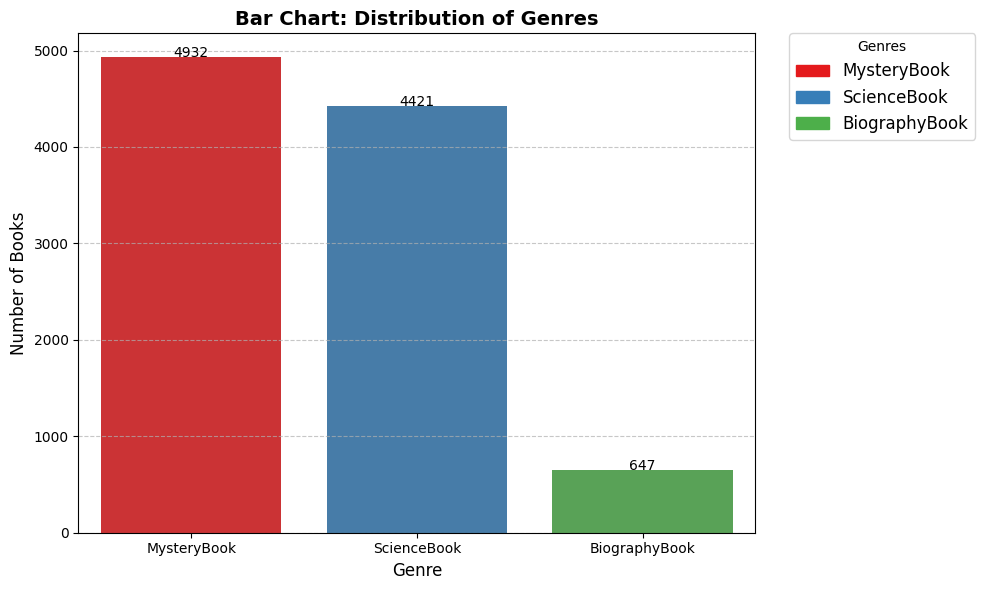

In [ ]:
# Step 1: Count the number of books for each genre
genre_counts = data['genre'].value_counts()

# Step 2: Create the bar chart with bright colors (Set1 palette for clear colors)
plt.figure(figsize=(10, 6))  # Reduced figure size for a more compact chart
bar_plot = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')

# Step 3: Enhance readability
plt.title('Bar Chart: Distribution of Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=0, ha='center')  # Set genre names to be horizontal

# Step 4: Display gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Add the value labels on top of the bars
for i in range(len(genre_counts)):
    plt.text(i, genre_counts.values[i] + 0.5, str(genre_counts.values[i]), ha='center', fontsize=10)

# Step 6: Manually create legend with colors corresponding to each genre
handles = [Patch(color=col, label=label) for col, label in zip(sns.color_palette('Set1', len(genre_counts)), genre_counts.index)]
plt.legend(handles=handles, title="Genres", loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Step 7: Show the plot
plt.tight_layout()  # Ensure the layout is optimized
plt.show()

**Bar Chart Trends : Distribution of Genres:**

The bar chart illustrates the distribution of books across three genres: MysteryBook, ScienceBook, and BiographyBook.

The data highlights key differences in genre representation within the library:

1. MysteryBook and ScienceBook are the most common genres, each having over 4,000 books in the collection.

2. BiographyBook has significantly fewer entries, with less than 1,000 books.

3. The library’s focus on fiction and science-related books may align with user preferences or collection priorities.

4. The lower count of BiographyBooks suggests a potential lack of demand or limited acquisitions.

## Bar Chart : Top 10 books with Highest Ratings

<ipython-input-13-e026958d2625>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_chart = sns.barplot(data=top_10_books, x='avg_rating', y='title', palette=colors, edgecolor='black', linewidth=1.2)


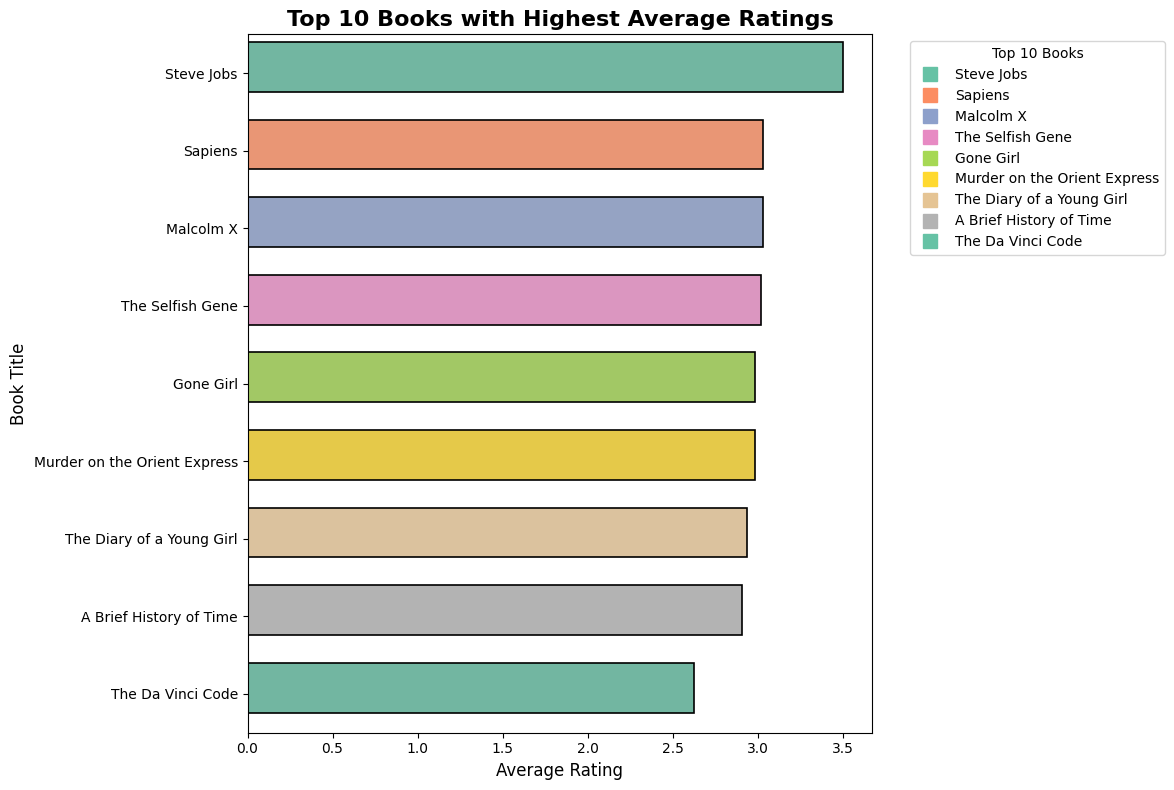

In [ ]:
# Step 1: Group data by book title and calculate the average rating
average_ratings = data.groupby('title')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)

# Step 2: Get the top 10 books with the highest average ratings
top_10_books = average_ratings.nlargest(10, 'avg_rating')

# Step 3: Plot a horizontal bar chart with vibrant colors
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Set2", len(top_10_books))  # Vibrant colors
bar_chart = sns.barplot(data=top_10_books, x='avg_rating', y='title', palette=colors, edgecolor='black', linewidth=1.2)

# Step 4: Add a legend outside the plot
handles = [plt.Line2D([], [], marker='s', color=color, linestyle='', markersize=10, label=book)
           for color, book in zip(colors, top_10_books['title'])]
plt.legend(handles=handles, title="Top 10 Books", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Step 5: Customize the chart
plt.title('Top 10 Books with Highest Average Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Reduce bar width
for bar in bar_chart.patches:
    bar.set_height(bar.get_height() * 0.8)  # Reduce height by 20%

# Show the plot
plt.tight_layout()
plt.show()

**Bar Chart Trends: Top Ten Books With Highest Average Rating**

The bar chart illustrates the top 10 books with the highest average ratings.
1. "Steve Jobs" stands out as the highest-rated book with an average rating exceeding 3.5, while the remaining books cluster closely together with average ratings slightly above 3.0.
2. Notable titles like "Sapiens," "Malcolm X," and "The Selfish Gene" demonstrate similar popularity and quality as perceived by readers, as indicated by their comparable ratings.
3. The difference between the highest and lowest ratings within this top-10 list is minimal, indicating a relatively high level of reader satisfaction across these books.
4. The presence of both non-fiction (e.g., "Sapiens," "Steve Jobs") and fiction (e.g., "Gone Girl," "The Da Vinci Code") highlights a balanced preference among top-rated books, catering to a wide range of reader interests.

## Box Plot : Average Reading Time by Price Changes

<ipython-input-17-4435cd3264aa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price Range', y='average_reading_time', data=data, palette='Set2')


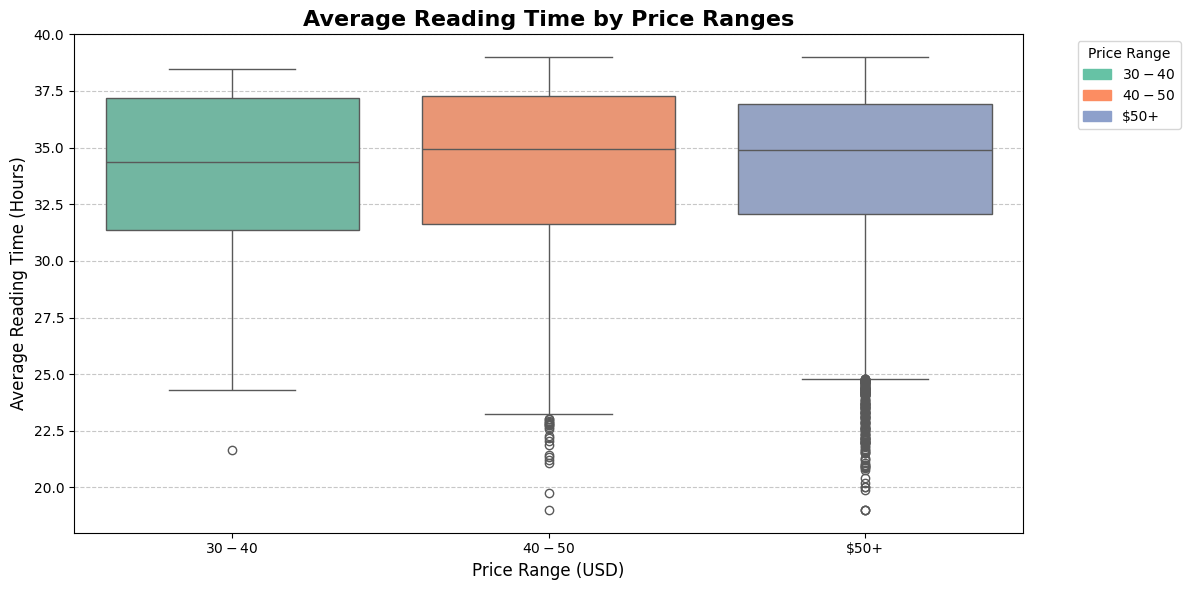

In [ ]:
# Step 1: Create simplified bins for price ranges
bins = [30, 40, 50, 100]  # Larger bins: 30-40, 40-50, 50+
labels = ['$30 - $40', '$40 - $50', '$50+']  # Bin labels with dollar signs
data['Price Range'] = pd.cut(data['price'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Create the boxplot with consistent color mapping
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='Price Range', y='average_reading_time', data=data, palette='Set2')

# Step 3: Customize the plot
plt.title('Average Reading Time by Price Ranges', fontsize=16, fontweight='bold')
plt.xlabel('Price Range (USD)', fontsize=12)
plt.ylabel('Average Reading Time (Hours)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 4: Add a legend with colors correctly mapped to the boxplot bins
handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette('Set2')[i]) for i in range(len(labels))]
plt.legend(handles, labels, title="Price Range", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

**BoxPlot Trend: Average Reading Time by Price Ranges**

The boxplot illustrates the distribution of average reading times across three distinct price ranges in the library catalog. The data highlights key trends in reader engagement based on book prices:

* Books priced between $30 $40 show a median reading time of approximately 33 hours, with the middle 50% of books falling between 30 and 36 hours. Outliers below 25 hours indicate a few books with significantly lower engagement.

* Books in the $40–$50 price range have a slightly wider spread, with a median reading time similar to the $30–$40 range but slightly higher variability. Outliers below 25 hours suggest occasional shorter reading times within this price category.

* The $50+ price range exhibits the highest variability in average reading time, with the middle 50% ranging between 31 and 36 hours. Several outliers below 30 hours reflect variability in reading engagement for more expensive books.

## Line Plot : Average ratings by genre overtime

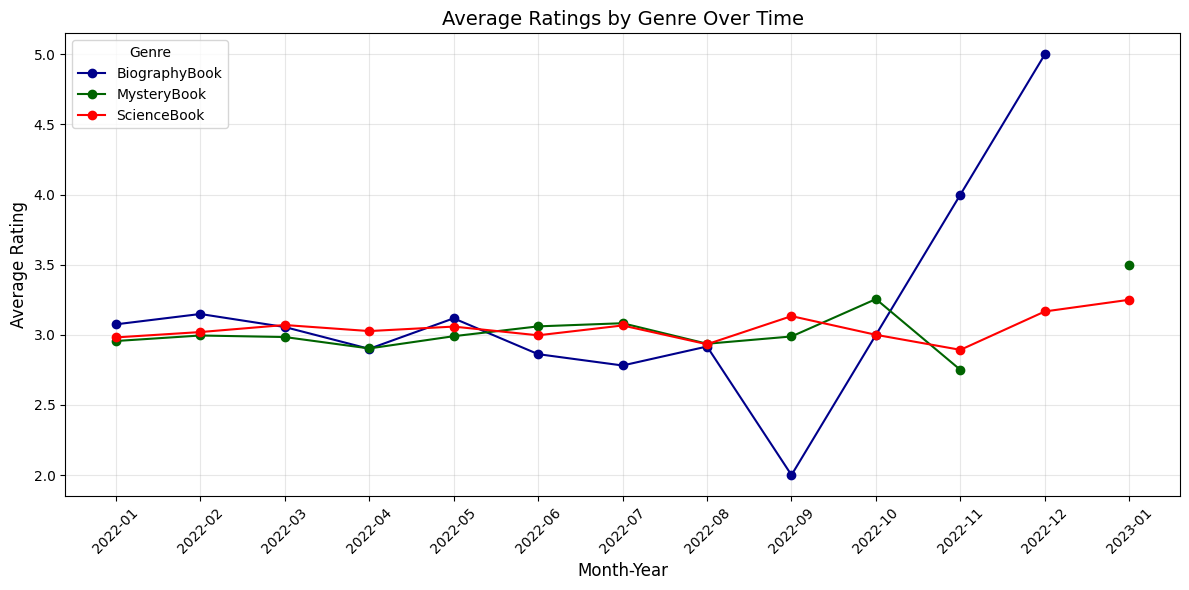

In [ ]:
 # Step 1: Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Step 2: Group data by date and genre to calculate average ratings
genre_ratings_over_time = data.groupby([data['date'].dt.to_period('M'), 'genre'])['rating'].mean().unstack()

# Step 3: Reindex the data to ensure no periods are missing for any genre
# Create a full time range covering the period from the first to the last available month
all_periods = pd.period_range(start=genre_ratings_over_time.index.min(), end=genre_ratings_over_time.index.max(), freq='M')

# Reindex genre_ratings_over_time to include all periods and forward fill missing values
genre_ratings_over_time = genre_ratings_over_time.reindex(all_periods, fill_value=None)

# Step 4: Plot the line chart
plt.figure(figsize=(12, 6))

# Define custom colors for the genres
custom_colors = {
    'MysteryBook': '#006400',  # Dark Green
    'ScienceBook': '#FF0000',  # Red
    'BiographyBook': '#00008B'  # Dark Blue
}

# Plot each genre with its assigned custom color
for genre in genre_ratings_over_time.columns:
    plt.plot(
        genre_ratings_over_time.index.astype(str),  # Convert PeriodIndex to string for the x-axis
        genre_ratings_over_time[genre],
        marker='o',
        label=genre,
        color=custom_colors.get(genre, '#FFA533')  # Default color if genre is not defined
    )

# Step 5: Customize the plot
plt.title('Average Ratings by Genre Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Genre', fontsize=10, loc='upper left')
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.tight_layout()
plt.show()


**Line Graph Trend: Average Ratings by Genre Over Time**

The line graph illustrates the trends in average ratings for books across three genres. The data highlights key insights into reader preferences and rating patterns:

**1. BiographyBook (Blue Line):**
 * The ratings remain steady at around 3.0 to 3.5 for most of the year.
 * A significant spike is observed in November 2022, where the average rating exceeds 4.5, indicating a surge in highly-rated entries or positive reader feedback.

**2. MysteryBook (Green Line):**
 * The ratings for MysteryBook consistently hover around 3.0 to 3.2, reflecting stable reader feedback over time.
 * The line disappears after November 2022, suggesting no additional data for MysteryBook in subsequent months due to a lack of new entries or reviews.

**3. ScienceBook (Red Line):**
 * ScienceBook ratings show minor fluctuations, ranging between 3.0 to 3.3, throughout the timeline.
 * A gradual upward trend is noticed from October 2022 onward, indicating an improvement in reader feedback.

##Histogram for Price Distribution for books across genres

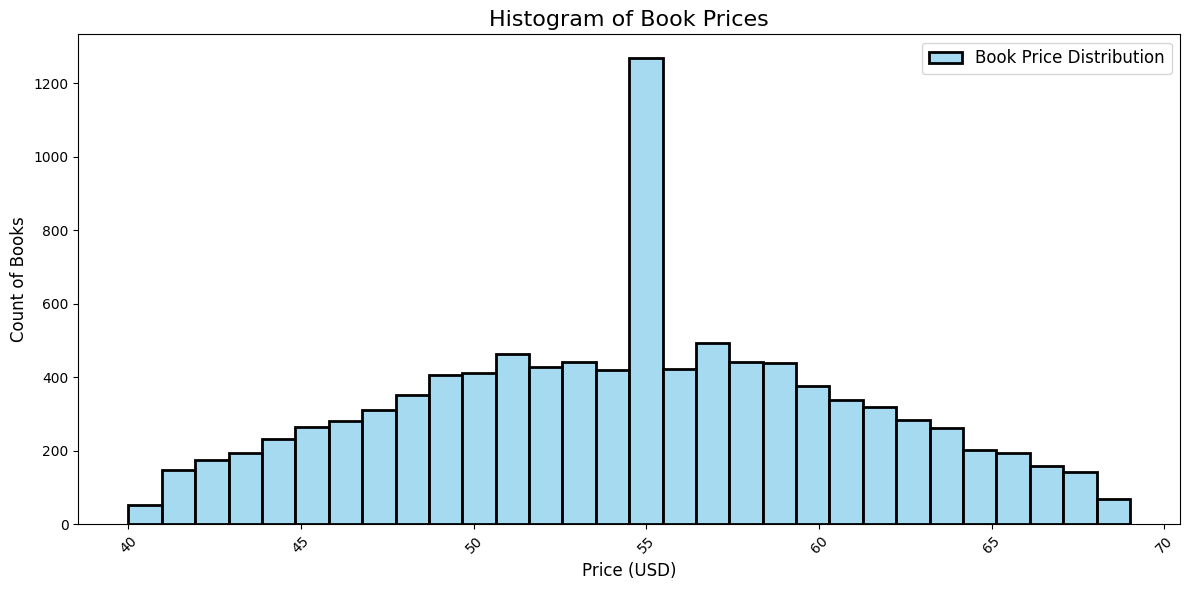

In [ ]:
# Assuming 'data' is your DataFrame and 'price' is the column of interest
# If necessary, load the data like so:
# data = pd.read_csv('/content/cleaned_books_catalog.csv')

# Step 1: Clean data (drop NaN values)
price_data = data['price'].dropna()

# Step 2: Create the histogram of price distribution (show count on Y-axis)
plt.figure(figsize=(12, 6))
sns.histplot(price_data, bins=30, kde=False, color='skyblue', edgecolor='black', stat='count', linewidth=2)

# Step 3: Customize the plot
plt.title('Histogram of Book Prices', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Count of Books', fontsize=12)

# Adjusting the number of ticks for both axes
plt.xticks(fontsize=10, rotation=45)  # Increased the number of x-axis ticks and rotated for readability
plt.yticks(fontsize=10)

# Removing gridlines
plt.grid(False)

# Step 4: Add a legend
plt.legend(['Book Price Distribution'], loc='upper right', fontsize=12)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


### **Histogram: Price Distribution for Books Across Genres**

The histogram illustrates the price distribution of books in the library catalog. The data showcases notable trends in book pricing and availability across various price ranges:

- Books priced between **\$45** and **\$65** dominate the distribution, forming a symmetrical pattern centered around **\$55**.
- Lower-priced books (below **\$45**) are significantly fewer, indicating limited availability in the low-price segment.
- Higher-priced books (above **\$65**) show a gradual decline in count, reflecting their relatively lower presence in the catalog.


## Histogram : Average Reading Time

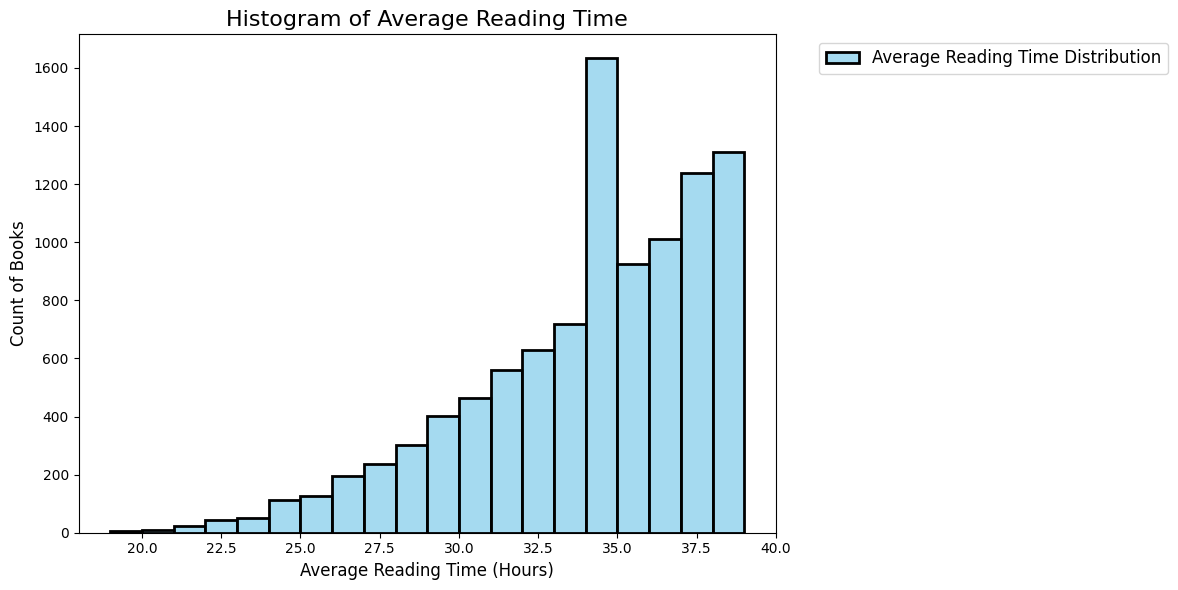

In [ ]:
# Step 1: Use the data directly as no missing values
reading_time_data = data['average_reading_time']  # No need to drop NaN if there are none

# Step 2: Create the histogram of average reading time distribution (show count on Y-axis)
plt.figure(figsize=(12, 6))
sns.histplot(reading_time_data, bins=20, kde=False, color='skyblue', edgecolor='black', stat='count', linewidth=2)

# Step 3: Customize the plot
plt.title('Histogram of Average Reading Time', fontsize=16)
plt.xlabel('Average Reading Time (Hours)', fontsize=12)
plt.ylabel('Count of Books', fontsize=12)

# Adjusting the number of ticks for both axes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Removing gridlines
plt.grid(False)

# Step 4: Add a legend in the blank space outside the plot
plt.legend(['Average Reading Time Distribution'], loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1))

# Step 5: Show the plot
plt.tight_layout()
plt.show()

### Histogram Trend : Average Reading Time Distribution

- **Trend in Reading Time**: The histogram shows the distribution of average reading times across books, with a focus on how many books fall within specific time ranges.
- **Peak Reading Time**: A majority of the books have an average reading time in the lower to mid-range, indicating that most books are relatively quick reads, typically under 25 hours.
- **Data Insights**: The absence of a clear tail for higher reading times suggests that longer books are less common in the dataset, reflecting a preference for shorter or moderately long books.


## Scatter Plot : Customer Engagement - Raeding Time vs Number of Ratings

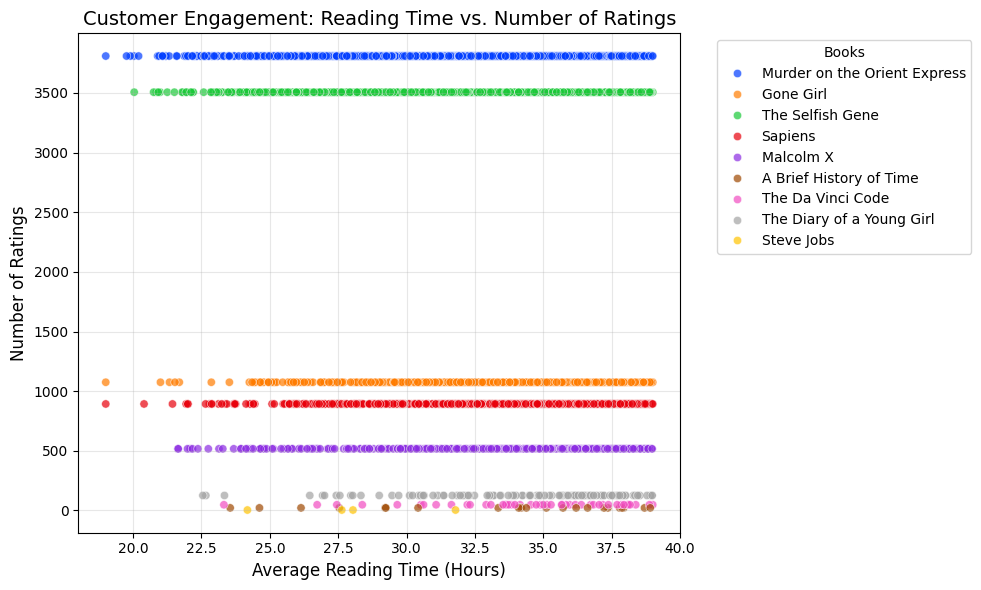

In [58]:
# Step 1: Group data to calculate the number of ratings per book
rating_counts = data.groupby('title')['rating'].count().reset_index()
rating_counts.rename(columns={'rating': 'num_ratings'}, inplace=True)

# Step 2: Merge with original dataset to include reading time
merged_data = pd.merge(data[['title', 'average_reading_time']].drop_duplicates(), rating_counts, on='title')

# Step 3: Plot the scatter plot with vibrant colors
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=merged_data, x='average_reading_time', y='num_ratings',
                          hue='title', palette='bright', alpha=0.7, legend='full')

# Step 4: Customize the legend
plt.legend(title="Books", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Step 5: Customize the plot
plt.title('Customer Engagement: Reading Time vs. Number of Ratings', fontsize=14)
plt.xlabel('Average Reading Time (Hours)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

### Scatter Plot Trends: Customer Engagement

The scatter plot illustrates customer engagement through the relationship between reading time and the number of ratings for books in the library catalog. The data highlights key trends in reader preferences and interaction across various titles:

- **Murder on the Orient Express** and **The Selfish Gene** exhibit the highest engagement levels, with over **3,500 ratings** each, reflecting widespread popularity and consistent reader interaction.
- Books like **Malcolm X** and **Gone Girl** demonstrate mid-tier engagement, attracting around **1,000 ratings**, indicating moderate popularity among readers.
- **Reading times** vary widely across titles, ranging from **20 to 40 hours**, with longer reading times generally associated with books receiving higher ratings.
- Titles such as **The Diary of a Young Girl** and **Steve Jobs** display lower engagement, with fewer than **500 ratings**, suggesting selective interest or a niche audience.


## Pie Chart


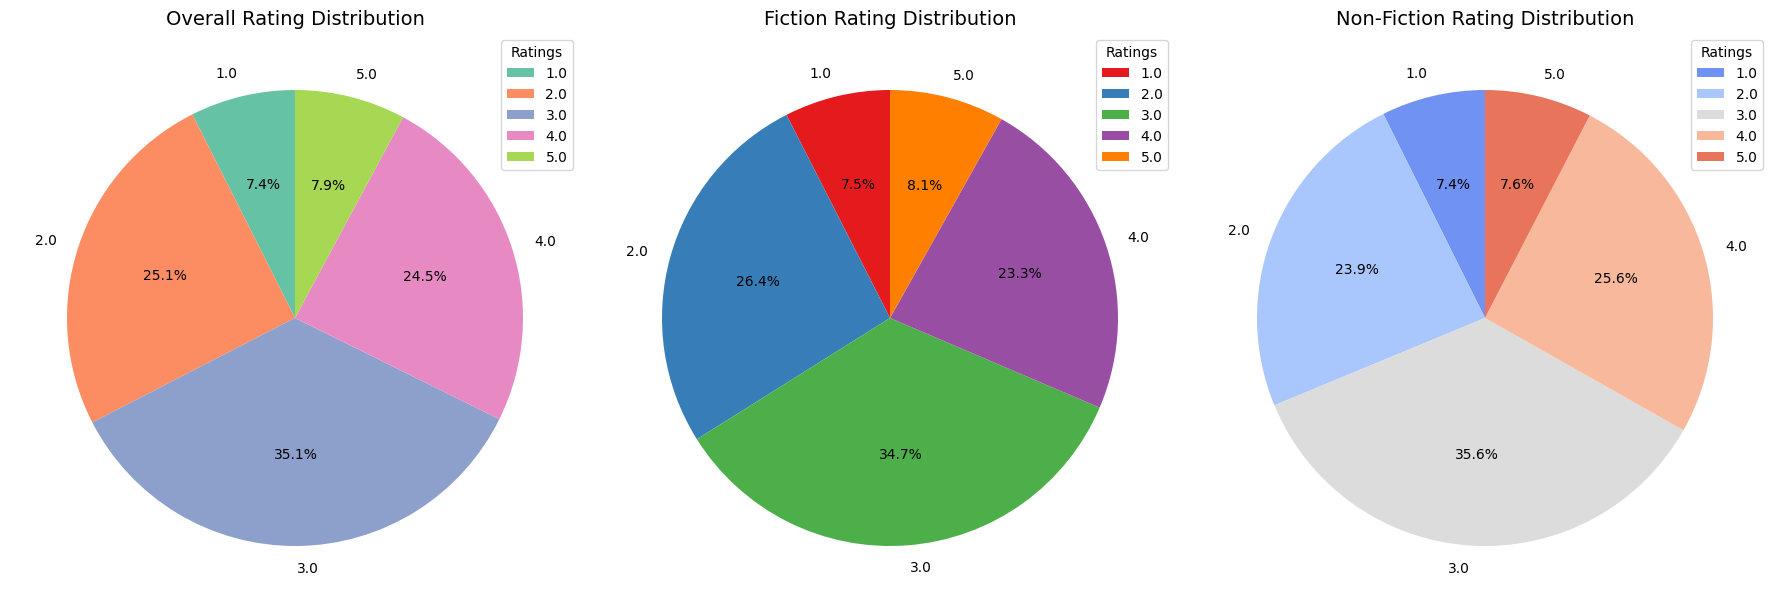

In [ ]:
# Step 1: Overall Rating Distribution (1 to 5)
rating_counts = data['rating'].value_counts().sort_index()

# Step 2: Fiction Rating Distribution
fiction_data = data[data['type'] == 'Fiction']
fiction_rating_counts = fiction_data['rating'].value_counts().sort_index()

# Step 3: Non-Fiction Rating Distribution
non_fiction_data = data[data['type'] == 'Non-Fiction']
non_fiction_rating_counts = non_fiction_data['rating'].value_counts().sort_index()

# Create a figure with 3 subplots (one for each pie chart)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Overall Rating Distribution
axes[0].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('Set2', len(rating_counts)))
axes[0].legend(rating_counts.index, title="Ratings", loc='upper right', fontsize=10)
axes[0].set_title('Overall Rating Distribution', fontsize=14)

# Plot 2: Fiction Rating Distribution
axes[1].pie(fiction_rating_counts, labels=fiction_rating_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('Set1', len(fiction_rating_counts)))
axes[1].legend(fiction_rating_counts.index, title="Ratings", loc='upper right', fontsize=10)
axes[1].set_title('Fiction Rating Distribution', fontsize=14)

# Plot 3: Non-Fiction Rating Distribution
axes[2].pie(non_fiction_rating_counts, labels=non_fiction_rating_counts.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('coolwarm', len(non_fiction_rating_counts)))
axes[2].legend(non_fiction_rating_counts.index, title="Ratings", loc='upper right', fontsize=10)
axes[2].set_title('Non-Fiction Rating Distribution', fontsize=14)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()


### Pie Chart Trend : Overall, Fiction, and Non-Fiction Rating Distribution

The pie charts illustrate the distribution of ratings across all books, fiction books, and non-fiction books in the library catalog. The data highlights trends in customer feedback and differences between genres:

#### Overall Rating Distribution:
- The majority of books received a rating of **3**, accounting for **35.1%** of the total ratings.
- Ratings of **2** and **4** follow, with **25.1%** and **24.5%**, respectively.
- Ratings of **1** and **5** are the least frequent, at **7.4%** and **7.9%**, respectively, indicating fewer books at the extremes of the rating scale.

#### Fiction Rating Distribution:
- Fiction books have the highest proportion of ratings at **3**, making up **34.7%** of all fiction ratings.
- Ratings of **2** and **4** are significant, with **26.4%** and **23.3%**, respectively.
- Ratings of **1** and **5** are close, at **7.5%** and **8.1%**, showing a slightly higher tendency toward extreme ratings compared to the overall dataset.

#### Non-Fiction Rating Distribution:
- Non-fiction books also show a dominance of ratings at **3**, comprising **35.6%** of all non-fiction ratings.
- Ratings of **4** and **2** follow, with **25.6%** and **23.9%**, respectively.
- Ratings of **1** and **5** are nearly equal, at **7.4%** and **7.6%**, respectively, showing fewer extremes compared to fiction.


## Heat Map : Average Reading Time by Rating and Type

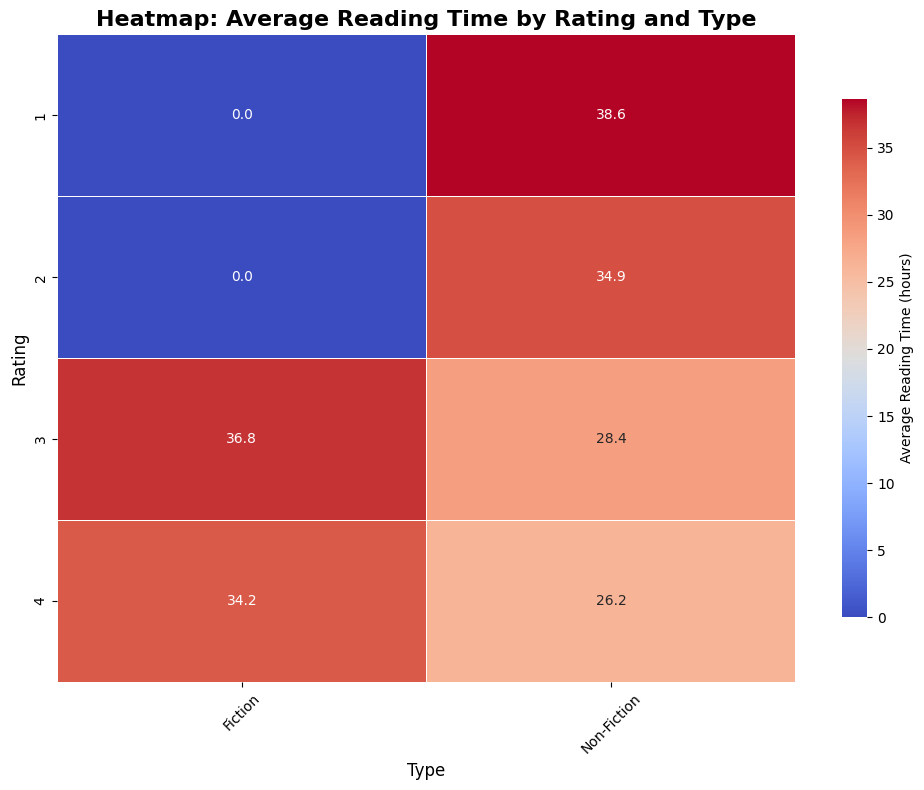

In [ ]:
# Your dictionary
data_dict = {
    "rating": [1, 2, 3, 3, 4, 4],
    "type": ["Non-Fiction", "Non-Fiction", "Fiction", "Non-Fiction", "Fiction", "Non-Fiction"],
    "average_reading_time": [38.630, 34.890, 36.765, 28.400, 34.225, 26.250]
}

# Convert the dictionary to a DataFrame
data = pd.DataFrame(data_dict)

# Create a pivot table for heatmap (average reading time by rating and type)
pivot_table = data.pivot_table(
    index="rating",
    columns="type",
    values="average_reading_time",
    aggfunc="mean",
    fill_value=0
)

# Define a sophisticated color palette for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Average Reading Time (hours)"}  # Color bar label
)

# Add title and axis labels
plt.title("Heatmap: Average Reading Time by Rating and Type", fontsize=16, fontweight="bold")
plt.xlabel("Type", fontsize=12)
plt.ylabel("Rating", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()



### Heatmap Trends : Average Reading Time by Rating and Type

The heatmap illustrates the relationship between book ratings and average reading time across two categories: fiction and non-fiction. The data reveals significant insights into how reading time varies based on book type and rating.

#### Key Data Trends:

- **Fiction**:
  - Books with a **rating of 3** have the highest average reading time of **36.8 hours**, indicating strong engagement for mid-rated fiction.
  - Books rated **4** show a slightly lower average reading time of **34.2 hours**, suggesting moderately engaging content.
  - **No data** is available for books rated **1** and **2** in fiction, indicating a lack of poorly-rated entries in this category.

- **Non-Fiction**:
  - Non-fiction books with a **rating of 1** show the highest average reading time of **38.6 hours**, indicating that despite low ratings, these books require significant reader effort.
  - Books rated **2** average **34.9 hours**, reflecting relatively high engagement even at lower ratings.
  - Ratings of **3** and **4** show declining reading times, with averages of **28.4 hours** and **26.2 hours**, respectively, suggesting that higher-rated non-fiction books are generally quicker reads.

#### Insights:

- **Fiction Insights**:
  - Fiction books with mid-range ratings (3 and 4) have consistently high engagement, implying a preference for immersive fiction with balanced quality.
  - The absence of low-rated fiction (1 and 2) highlights the library’s focus on maintaining quality within this genre.

- **Non-Fiction Insights**:
  - Non-fiction books with low ratings (1 and 2) demand more reading time, potentially due to complex topics or less engaging content.
  - Higher-rated non-fiction (3 and 4) tends to be quicker reads, suggesting better-written or more accessible content in this category.


### Recommendation Section:

1. **Diversify Genre Representation**:
   - Increase the collection of **BiographyBooks** to balance genre availability and cater to a broader audience. This can attract readers with interests in real-life stories and historical accounts, addressing the current gap in the library’s offerings.

2. **Enhance Pricing Strategy**:
   - Introduce a wider range of books in the **lower-priced segment** (<$45) to ensure affordability for cost-sensitive readers. Similarly, evaluate the content quality of **higher-priced books** ($50+) to justify their cost and improve reader engagement.

3. **Expand Quick-Read Options**:
   - Add more books with shorter **average reading times** (<25 hours) to meet the needs of busy readers or those seeking less time-intensive options. This will enhance the library’s appeal to diverse reader preferences.

4. **Improve Data Tracking**:
   - Address gaps in data, such as the missing entries for **MysteryBooks** post-November 2022, by implementing robust tracking systems to ensure consistent updates across all genres and time periods.


### Conclusion :

The dataset provides a well-rounded view of the library’s collection, shedding light on patterns in book pricing, genre preferences, ratings, and reader engagement.

- **Dominant Genres**: Fiction and Science books dominate the collection, indicating strong reader interest in imaginative and knowledge-driven content. The limited presence of Biography books highlights an opportunity for expansion in this genre.

- **Pricing Structure**: The majority of books are priced within a balanced mid-range (**$45–$65**), ensuring accessibility and affordability for a wide range of readers.

- **Reader Engagement**: Engagement varies across genres and price ranges:
    - Mid-priced books show consistent engagement.
    - Higher-priced books display greater variability in reading times, reflecting differing levels of reader commitment.

- **Ratings Patterns**: Ratings are consistently high across genres, suggesting uniform quality within the collection. Fiction books, however, exhibit a slightly higher proportion of perfect ratings, underscoring their popularity and positive reception.

- **Overall Insights**: The dataset reflects a well-curated library collection with opportunities for improvement:
    - Increase genre diversity, especially for **Biography** books.
    - Address gaps in quick-read options to cater to varied reader preferences.
    - Maintain focus on quality and accessibility to serve a broad readership effectively.


##Thank You Code :

In [60]:
from IPython.display import display, HTML

# Create a "Thank You" message in a styled HTML format
thank_you_message = """
<h1 style="color: #4CAF50; text-align: center;">Thank You!</h1>
<p style="font-size: 20px; text-align: center;"> We hope you liked our visualization and documentation!</p>
"""

# Display the message
display(HTML(thank_you_message))
